# АНАЛИЗ БАЗЫ ДАННЫХ
он-лайн библиотеки

Цель работы: исследование базы данных для формированния ценностного предложение для нового продукта.

План работ:
1. Ознакомление с базой данной;
2. Вопросы от бизнесса:
     - сколько книг вышло после 1 января 2000 года;
     - количество обзоров для каждой книги и средняя оценка;
     - издательство, которое выпустило наибольшее число книг толще 50 страниц (исключить брошюры);
     - автор с самой высокой средней оценкой книг (учитывать только книги с 50 и более оценками);
     - среднее количество обзоров от пользователей, которые поставили больше 48 оценок.
3. Выводы

In [22]:
import pandas as pd
import sqlalchemy as sa

In [23]:
db_config = {
'user': 'praktikum_student',
'pwd': 'Sdf4$2;d-d30pp', 
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,
'db': 'data-analyst-final-project-db' 
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [24]:
# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [25]:
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

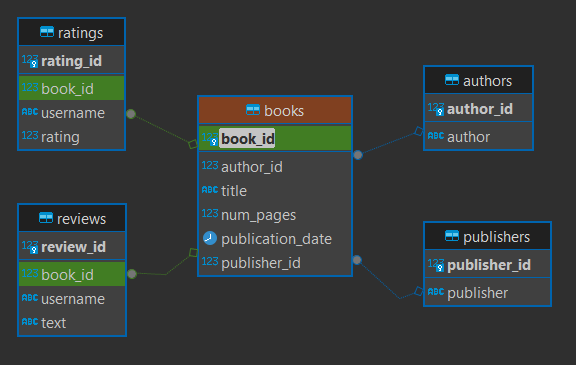

## Ознакомлениие с данными

In [26]:
#Таблица books
query = '''SELECT * FROM books LIMIT 5'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [27]:
#Таблица books
query = '''select MIN(publication_date), MAX(publication_date)
from books	'''
get_sql_data(query)

,min,max
0,1952-12-01,2020-03-31


In [28]:
#Таблица books
query = '''SELECT COUNT(*) FROM books'''
get_sql_data(query)

,count
0,1000


In [29]:
query = '''SELECT COUNT(DISTINCT title) FROM books'''
get_sql_data(query)

,count
0,999


В таблице books предоставленный данный о книгах изданных с 01 января 1952 года по 31 марта 2020 г., помимо названий книг и дат публикаций, указано количество страниц в каждой книге, а также ключи для авторов и изданий. Таблица содержит 999 уникальных названий книг, иногда книги называют одинаково или издают в разных изданиях, а может дубли, надо посмотреть.

In [30]:
query = ''' SELECT *
            FROM books
            WHERE title IN (
            				SELECT title
            				FROM books
            				GROUP BY title
            				HAVING COUNT(title)>1)'''
            
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,426,39,Memoirs of a Geisha,434,2005-11-15,241
1,427,39,Memoirs of a Geisha,503,2005-11-22,311


Мемуары Гейши на пики популярности выпустили аж в двух изданиях, дубликтов нет.

In [31]:
#Таблица ratings
query = '''SELECT * FROM ratings LIMIT 5'''
get_sql_data(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [32]:
query = '''SELECT COUNT(*) FROM ratings'''
get_sql_data(query)

,count
0,6456


In [33]:
query = '''SELECT COUNT(DISTINCT username) FROM ratings'''
get_sql_data(query)

,count
0,160


Таблица ratings содержит 6456 записей пользовательских рейтингов с указанием ников пользователей и ключами для таблицы books.  Рейтинги выставлены 160 пользователями.

In [34]:
#Таблица reviews
query = '''SELECT * FROM reviews LIMIT 5'''
get_sql_data(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [35]:
query = '''SELECT COUNT(DISTINCT username) FROM reviews'''
get_sql_data(query)

,count
0,160


Таблица reviews содержит пользовательские обзоры с указанием ников пользователей и ключём для таблицы books. И тоже 160 пользователей.

In [36]:
#Таблица authors
query = '''SELECT * FROM authors LIMIT 5'''
get_sql_data(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица authors содержить имена авторов с их id, в некоторых id содружества авторов

In [37]:
#Таблица publishers
query = '''SELECT * FROM publishers LIMIT 5'''
get_sql_data(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица publishers содержится информация об изданиях и их id.

## Вопросы бизнесса:

### Cколько книг вышло после 1 января 2000 года;

In [38]:
query = '''   
SELECT COUNT (DISTINCT book_id)
FROM  books 
WHERE publication_date > '2000-01-01'
'''
get_sql_data(query)

,count
0,819


После 1 января 2000 года было выпущено 819 книг.

### <a name="_"></a>Количество обзоров для каждой книги и средняя оценка;

In [39]:
query = '''   
select b.BOOK_ID, b.title, count(DISTINCT r2.review_id), avg(r.rating) 
from books b 
left join ratings r ON b.book_id = r.book_id 
left join reviews r2 on b.book_id = r2.book_id 
group by b.book_id, b.title 
'''
get_sql_data(query)

,book_id,title,count,avg
0,1,'Salem's Lot,2,3.666667
1,2,1 000 Places to See Before You Die,1,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,4,1491: New Revelations of the Americas Before C...,2,4.500000
4,5,1776,4,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.666667
996,997,Xenocide (Ender's Saga #3),3,3.400000
997,998,Year of Wonders,4,3.200000
998,999,You Suck (A Love Story #2),2,4.500000


### Издательство, которое выпустило наибольшее число книг толще 50 страниц (исключить брошюры);

In [40]:
query = '''   
select publisher 
from publishers p 
where publisher_id in (
			select publisher_id
			from books b 
			where num_pages > 50
			group by publisher_id
			order by count(book_id) desc 
			limit 1)
'''
get_sql_data(query)

,publisher
0,Penguin Books


Британское издательство Пингвин Букс выпусктило больше всего книг - 42 книги.

### Автор с самой высокой средней оценкой книг (учитывать только книги с 50 и более оценками);

In [41]:
query = '''   
select author, round(avg(r.rating),2) as avg_rating
from  books b
join ratings r on b.book_id = r.book_id 
join authors a on a.author_id =b.author_id 
group by b.book_id, a.author  
having count(rating)>50
order by avg_rating desc 
limit 1
'''
get_sql_data(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.41


Самый высокооцененный пользователями автор -  Джоан Роулинг

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [42]:
query = '''   
with cnt as(
		select count(review_id), username 
		from reviews r 
		where username in (		
				select username
				from ratings r 
				group by username 
				having count(rating) > 48)
		group by username)
select AVG(count)
from cnt
'''
get_sql_data(query)

,avg
0,24.0


Самые активные пользователи написали в среднем 24 обзора.

Выводы:
 - в данных около 1000 книг;
 - данные предоставлены о книгах выпущенных с 1 декабря 1952 года по 31 марта 2020 года;
 - рейтинги и ревью написано 160 пользрователями;
 - 819 книг выпущены после начала 2000 года;
 - издательство Пингвин Букс выпустило больше всего книг;
 - cамый высокооцененный пользователями автор -  Джоан Роулинг;
 - cамые активные пользователи написали в среднем 24 обзора;
 - количество обзоров для каждой книги и средние оценки [представлены в таблице](#_)
 
